In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

os.listdir("/kaggle/input/skin-cancer-malignant-vs-benign")

os.listdir("/kaggle/input/skin-cancer-malignant-vs-benign/train")

ben_dir = "/kaggle/input/skin-cancer-malignant-vs-benign/train/benign"
malig_dir = "/kaggle/input/skin-cancer-malignant-vs-benign/train/malignant"

train_dir = "/kaggle/input/skin-cancer-malignant-vs-benign/train"
test_dir = "/kaggle/input/skin-cancer-malignant-vs-benign/test"

print("Number of images in benign folder:",len(os.listdir("/kaggle/input/skin-cancer-malignant-vs-benign/train/benign")))
print("Number of images in malignant folder:",len(os.listdir("/kaggle/input/skin-cancer-malignant-vs-benign/train/malignant")))

Number of images in benign folder: 1440
Number of images in malignant folder: 1197


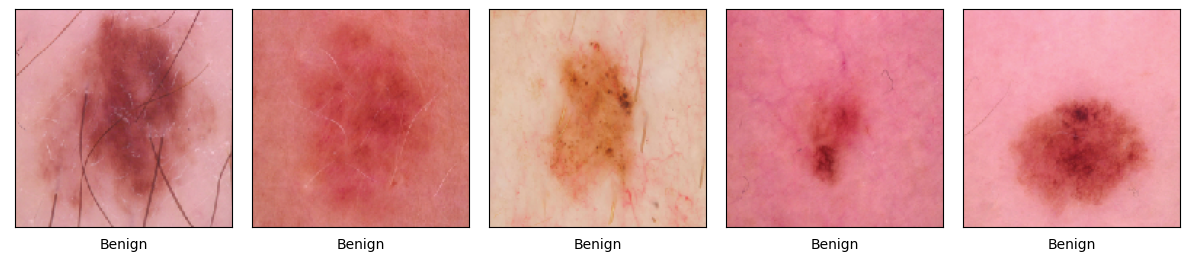

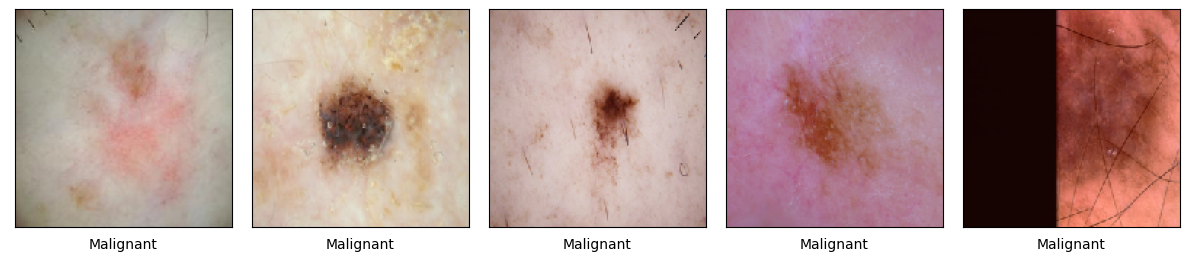

In [2]:
import random
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import load_img
plt.figure(figsize=(12,7))
ben = random.sample(os.listdir(ben_dir),5)
malig = random.sample(os.listdir(malig_dir),5)

for i,img in enumerate(ben):
    path = os.path.join(ben_dir,img)
    img = load_img(path, target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Benign")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout();

plt.figure(figsize=(12,7))
for i,img in enumerate(malig):
    path = os.path.join(malig_dir,img)
    img = load_img(path, target_size=(150,150))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.xlabel("Malignant")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout();

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =(1./255),rotation_range=0.2,
    width_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip= True)

val_datagen = ImageDataGenerator(rescale =(1./255))

train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                               target_size =(224,224),
                                               class_mode = "categorical",
                                               batch_size =32)
test_data = val_datagen.flow_from_directory(directory = test_dir, 
                                               target_size =(224,224),
                                               class_mode = "categorical",
                                               batch_size =32)


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


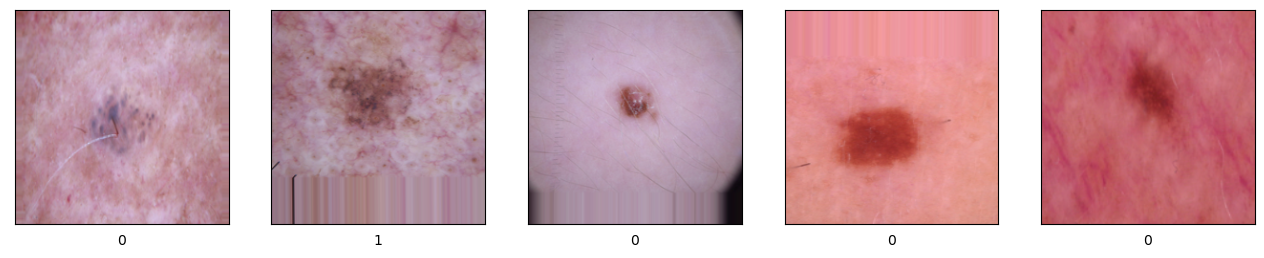

In [4]:
from tensorflow.keras.preprocessing import image
sample_x, sample_y = next(train_data)
plt.figure(figsize=(16,9))
for i in range(5):
    plt.subplot(1,5,i+1)
    img = image.img_to_array(sample_x[i])
    plt.imshow(img)
    plt.xlabel(np.argmax(sample_y[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()


In [5]:
from tensorflow.keras.applications import VGG16

In [6]:
dense = VGG16(weights = "imagenet", include_top = False, input_shape=(224,224,3))

58889256/58889256 [==============================] - 3s 0us/step


In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization

model = Sequential()
model.add(dense)
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "sigmoid"))

In [8]:
#comment cell
VGG16_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

VGG16_model.add(pretrained_model)

VGG16_model.add(BatchNormalization())
VGG16_model.add(Dropout(0.3))

VGG16_model.add(Flatten())
VGG16_model.add(Dense(512, activation='relu'))
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(2, activation='softmax'))

In [9]:
#comment cell
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 512)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 3, 3, 512)        2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 3, 3, 512)         0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 512)               2

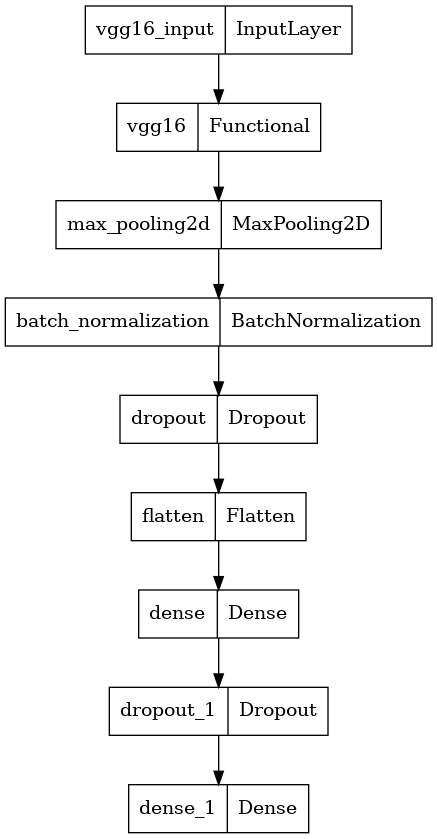

In [11]:
plot_model(model,
    to_file='VGG16.png',
    show_shapes=False,
    show_layer_names=True)

In [12]:
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa
from tensorflow.keras import metrics
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.optimizers import Adam
from tensorflow_addons.metrics import MatthewsCorrelationCoefficient
metrics = ['accuracy',
           metrics.Precision(name='precision'),
           metrics.Recall(name='recall'),
           F1Score(num_classes = 2,name = 'f1'),
           MatthewsCorrelationCoefficient(num_classes = 2,name='mc'),
           tf.keras.metrics.TruePositives(name= 'tp'),
           tf.keras.metrics.TrueNegatives(name = 'tn'),
           tf.keras.metrics.FalseNegatives(name = 'fn'),
           tf.keras.metrics.FalsePositives(name = 'fp')
          ]

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-addons
    Found existing installation: tensorflow-addons 0.17.1
    Uninstalling tensorflow-addons-0.17.1:
      Successfully uninstalled tensorflow-addons-0.17.1


In [13]:
lr=0.0001
model.compile(optimizer = Adam(lr = 0.0001), loss = "categorical_crossentropy", metrics = metrics)

In [14]:
patience = 1
stop_patience = 3
factor = 0.5
#    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("vgg16.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]

In [15]:
history = model.fit(train_data, validation_data = test_data, epochs = 30, 
                    verbose = 1, callbacks = callbacks )

Epoch 1/30
83/83 [==============================] - 73s 766ms/step - loss: 0.5069 - accuracy: 0.7713 - precision: 0.7322 - recall: 0.7600 - f1: 0.7698 - mc: 0.5399 - tp: 2004.0000 - tn: 1904.0000 - fn: 633.0000 - fp: 733.0000 - val_loss: 3.9931 - val_accuracy: 0.4545 - val_precision: 0.4545 - val_recall: 0.4545 - val_f1: 0.3125 - val_mc: 0.0000e+00 - val_tp: 300.0000 - val_tn: 300.0000 - val_fn: 360.0000 - val_fp: 360.0000 - lr: 1.0000e-04
Epoch 2/30
83/83 [==============================] - 43s 522ms/step - loss: 0.4555 - accuracy: 0.7960 - precision: 0.7676 - recall: 0.7789 - f1: 0.7955 - mc: 0.5938 - tp: 2054.0000 - tn: 2015.0000 - fn: 583.0000 - fp: 622.0000 - val_loss: 3.7173 - val_accuracy: 0.4818 - val_precision: 0.5183 - val_recall: 0.5803 - val_f1: 0.3661 - val_mc: 0.1529 - val_tp: 383.0000 - val_tn: 304.0000 - val_fn: 277.0000 - val_fp: 356.0000 - lr: 1.0000e-04
Epoch 3/30
83/83 [==============================] - 43s 511ms/step - loss: 0.4175 - accuracy: 0.8127 - precision: 0.

In [16]:
model.save("vgg16.h5")
model.evaluate(test_data)

21/21 [==============================] - 3s 128ms/step - loss: 0.3045 - accuracy: 0.8667 - precision: 0.8649 - recall: 0.8636 - f1: 0.8665 - mc: 0.7375 - tp: 570.0000 - tn: 571.0000 - fn: 90.0000 - fp: 89.0000


[0.3045136332511902,
 0.8666666746139526,
 0.8649469017982483,
 0.8636363744735718,
 array([0.87172014, 0.8611988 ], dtype=float32),
 0.7375432252883911,
 570.0,
 571.0,
 90.0,
 89.0]

In [17]:
import itertools
y_pred = model.predict(test_data)

21/21 [==============================] - 3s 121ms/step


In [18]:
#y_pred = np.argmax(y_pred, axis=1)
y_pred = list(itertools.chain.from_iterable(y_pred))

pred = []
def prediction(label):
    for i in label:
        if i > 0.5:
            pred.append(1)
        else:
            pred.append(0)
    return pred
       
predict = prediction(y_pred) #predict = 
print(predict)

[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 

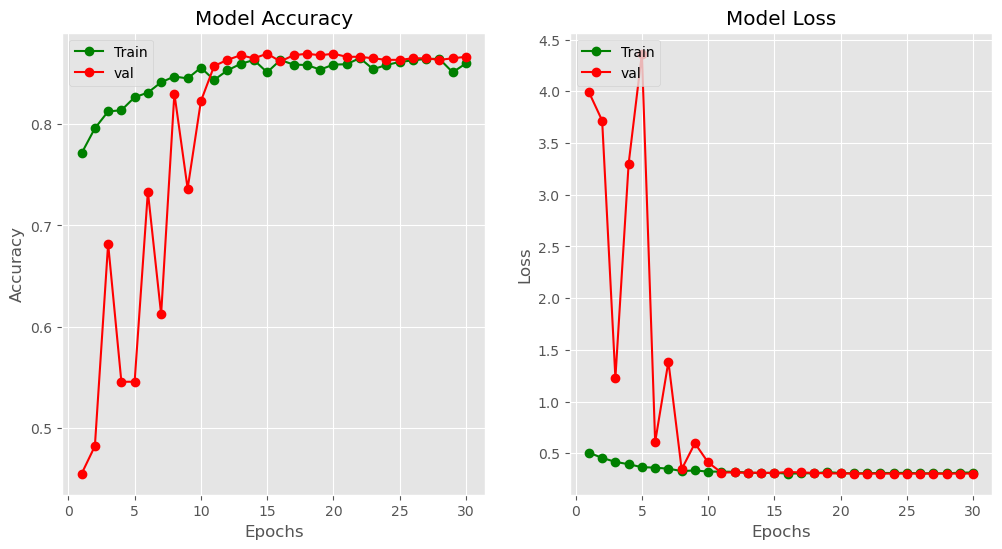

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,31)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")
#plt.show()

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

test_data.labels

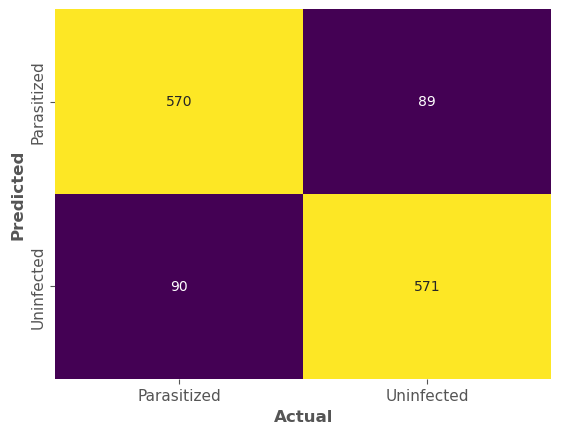

In [20]:
import seaborn as sns
cm_data = [[history.history['val_tp'][-1], history.history['val_fp'][-1]], [history.history['val_fn'][-1], history.history['val_tn'][-1]]]
sns.heatmap(cm_data, annot=True, cmap = 'viridis',cbar = False,fmt = 'g')
plt.xticks([0.5,1.5],["Parasitized","Uninfected"],fontsize=11)
plt.yticks([0.5,1.5],["Parasitized","Uninfected"],fontsize=11)
plt.xlabel("Actual",fontsize=12, fontweight="bold")
plt.ylabel("Predicted",fontsize=12, fontweight="bold")
plt.show()

In [21]:
TP = history.history['val_tp'][-1]
print("TP =", TP)
FP = history.history['val_fp'][-1]
print("FP =", FP)
TN = history.history['val_tn'][-1]
print("TN =", TN)
FN = history.history['val_fn'][-1]
print("FN =", FN)

TP = 570.0
FP = 89.0
TN = 571.0
FN = 90.0


In [22]:
FPR= (FP/(FP+TN))
TPR= (TP/(TP+FN))
print("FPR=", FPR)
print("TPR=", TPR)

FPR= 0.13484848484848486
TPR= 0.8636363636363636


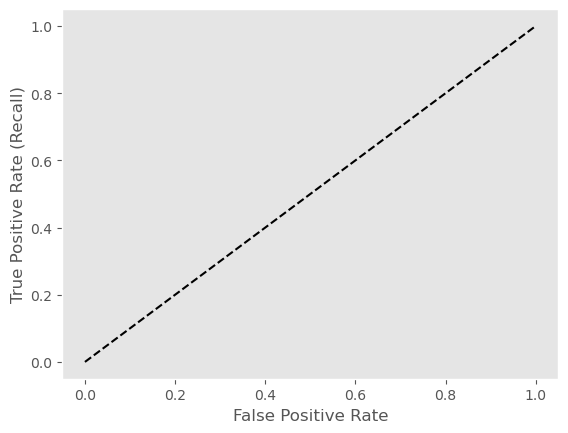

In [23]:
from sklearn.metrics import roc_curve
def plot_roc_curve (FPR, TPR, label = None):
    plt.plot(FPR, TPR, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid()
    
plot_roc_curve(FPR, TPR)
plt.show()


In [24]:
import tensorflow as tf
model.trainable = True
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

epochs = 20
model.fit(train_data, epochs=epochs, validation_data=test_data)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 512)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 3, 3, 512)        2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 3, 3, 512)         0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 512)               2

In [25]:
model.save("VGG16.h5")
model.evaluate(test_data)

21/21 [==============================] - 2s 113ms/step - loss: 0.7253 - categorical_accuracy: 0.6591


[0.7252711057662964, 0.6590909361839294]